In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from modules import binding_energy
from modules import standard_deviation
import pandas as pd
import cgs

In [7]:
# Data
df = pd.read_fwf('BE_data.txt', usecols=(2,3,11),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              skiprows=39, header=None,
              index_col=False)
df = np.array(df)
N_data0 = np.array(df[:, 0])
Z_data0 = np.array(df[:, 1])

BE0 = np.array(df[:, 2])

for i in range(len(BE0)):
    if BE0[i][-1] == '#':
        BE0[i] = -1.0
N_data = np.array([])
Z_data = np.array([])
BE = np.array([])
for i in range(len(BE0)):
    if BE0[i] != -1.0:
        N_data = np.append(N_data, N_data0[i])
        Z_data = np.append(Z_data, Z_data0[i])
        BE = np.append(BE, BE0[i])
BE = BE.astype('float64')
Bexp_data = BE
print(BE[200])


N_data = N_data[7:]
Z_data = Z_data[7:]
Bexp_data = Bexp_data[7:] * (N_data + Z_data) / 1000
# Combine Z and N into a 2D array for curve_fit
ZN_data = np.vstack((Z_data, N_data)).T

# Perform the least-squares fit
params_initial = [15, 17, 0.7, 11, 1.5, 1.0, 30, 20.0, -20.0, -1.0, -2.0, 0.1]  # Initial guesses for av, as_, ac, ap, kv, ks, W


params_opt, params_cov = curve_fit(lambda ZN, av, as_, ac, ap, kv, ks, W, ak, a0, fp, b1, b2
                                   : binding_energy(ZN[:, 0], ZN[:, 1], av, as_, ac, ap, kv, ks, W, ak, a0, fp, b1, b2), 
                                   ZN_data, Bexp_data, p0=params_initial, maxfev = int(1e5), method = 'lm')
# params_opt, params_cov = curve_fit(lambda ZN, av, as_, ac, kv, ks
#                                    : binding_energy_only_5(ZN[:, 0], ZN[:, 1], av, as_, ac, kv, ks), 
#                                    ZN_data, Bexp_data, p0=params_initial, maxfev = int(1e5))
Bfit = binding_energy(Z_data, N_data, *params_opt)
# # standard deviation
sigma = standard_deviation(Bfit, Bexp_data)
a_v = params_opt[0]
a_s = params_opt[1]
a_c = params_opt[2]
a_p = params_opt[3]
k_v = params_opt[4]
k_s = params_opt[5]
W = params_opt[6]
a_k = params_opt[7]
a_0 = params_opt[8]
f_p = params_opt[9]
b_1 = params_opt[10]
b_2 = params_opt[11]
# # Output the fitted coefficients
print("Fitted coefficients:")
print(f"av: {a_v}")
print(f"as: {a_s}")
print(f"ac: {a_c}")
print(f"ap: {a_p}")
print(f"kv: {k_v}")
print(f"ks: {k_s}")
print(f"W: {W}")
print(f"ak: {a_k}")
print(f"a0: {a_0}")
print(f"fp: {f_p}")
print(f'b1: {b_1}')
print(f'b2: {b_2}')
print(f'r0: {3 * cgs.e ** 2 / (a_c * 1.60218e-6) / 5 / (1.e-13)}')
print(f"Standard Deviation: {sigma}")

8142.472
Fitted coefficients:
av: 15.8725848372109
as: 17.385038162818653
ac: 0.744084410356598
ap: 10.627742891551916
kv: 1.9355280346707353
ks: 2.808942611423926
W: 37.057671566275665
ak: 13.781782057755779
a0: -29.92728319950332
fp: -1.708463863114802
b1: -0.7398922084209109
b2: 0.0133429674372431
r0: 1.1611252779126755
Standard Deviation: 1.2040233949955357


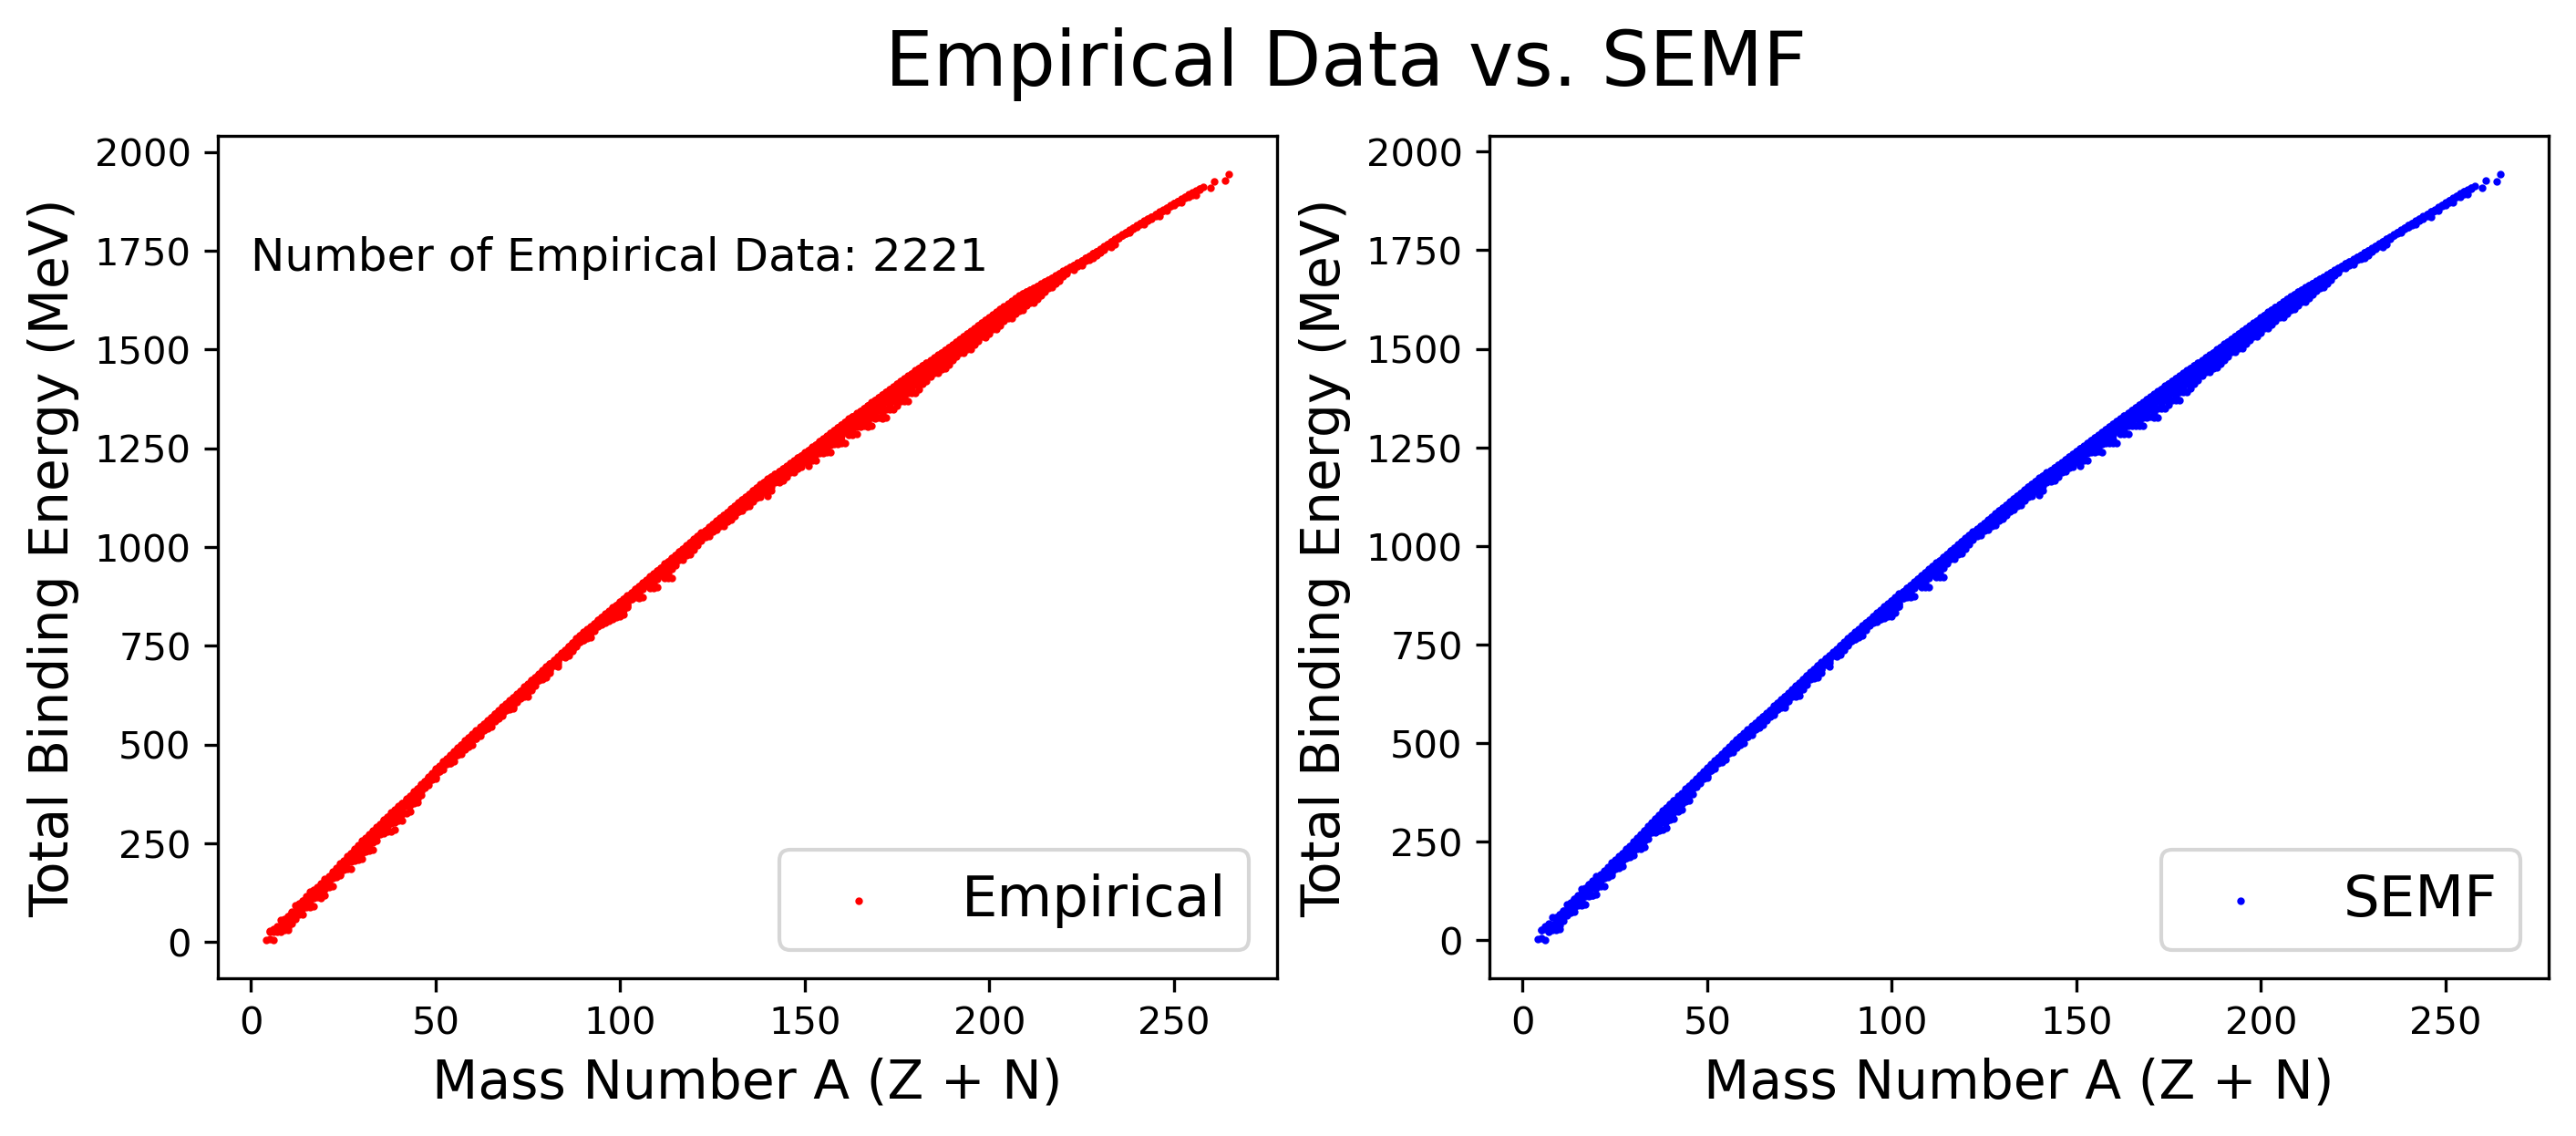

In [10]:
# # Plot experimental vs. fitted values
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig, axs = plt.subplots(1, 2, figsize=(11, 4))
fig.suptitle('Empirical Data vs. SEMF', fontsize=20)
axs[0].scatter(Z_data + N_data, Bexp_data, label='Empirical', color='red', s=1)
axs[1].scatter(Z_data + N_data, Bfit, label='SEMF', color='blue', s=1)
axs[0].set_xlabel('Mass Number A (Z + N)', fontsize = 14)
axs[0].set_ylabel('Total Binding Energy (MeV)', fontsize = 14)
axs[1].set_xlabel('Mass Number A (Z + N)', fontsize = 14)
axs[1].set_ylabel('Total Binding Energy (MeV)', fontsize = 14)
axs[0].text(0, 1700, f'Number of Empirical Data: {len(Z_data)}', fontsize = 12)
# axs[1].text(-50, 1000, f"\n \
            # $a_v$: {a_v:.2f}\n \
            # $a_s$: {a_s:.2f}\n \
            # $a_c$: {a_c:.2f}\n \
            # $a_p$: {a_p:.2f}\n \
            # $k_v$: {k_v:.2f}\n \
            # $k_s$: {k_s:.2f}\n \
            # $W$: {W:.2f}\n \
            # $a_k$: {a_k:.2f}\n \
            # $a_0$: {a_0:.2f}\n \
            # $f_p$: {f_p:.2f}\n \
            # $\sigma$: {sigma:.2f}\n", fontsize=13)
# plt.savefig('../../../Desktop/research/presentation_1226/beamer/fitting.png')
axs[0].legend(fontsize = 15, loc='lower right')
axs[1].legend(fontsize = 15, loc='lower right')
# plt.show()